In [2]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from PIL import Image
from scipy import ndimage
from scipy import spatial
import tensorflow as tf
#import imagehash
from scipy.stats import wasserstein_distance
from scipy.spatial import distance as dist

In [3]:
#Chapter2_input_images_for code/patterndata

In [4]:
path_train = 'Chapter2_input_images_for code/patterndata/train'
path_test = 'Chapter2_input_images_for code/patterndata/test'

In [5]:
radius = 5
num_pts = 25
match=0

In [7]:
os.listdir(path_train)

['plain1train.jpeg',
 'pattern6train.jpeg',
 'plain3train.jpeg',
 'pattern5train.jpeg',
 'pattern3train.jpeg',
 'pattern7train.jpeg',
 'plain4train.jpeg',
 'pattern4train.jpeg',
 'pattern2train.jpeg',
 'plain2train.jpeg',
 'pattern1train.jpeg']

In [8]:
lbp_train_features=[]
train_data = []
for filename in os.listdir(path_train):
    image_train = os.path.join(path_train, filename)
    print(image_train)
    trainimg = Image.open(image_train)
    trainarr = np.asarray(trainimg)
    traingray = cv2.cvtColor(trainarr, cv2.COLOR_BGR2GRAY)
    train_lbp = local_binary_pattern(traingray, num_pts, radius, 'uniform')
    lbp_train_features.append(train_lbp)
    train_data.append(filename)

Chapter2_input_images_for code/patterndata/train/plain1train.jpeg
Chapter2_input_images_for code/patterndata/train/pattern6train.jpeg
Chapter2_input_images_for code/patterndata/train/plain3train.jpeg
Chapter2_input_images_for code/patterndata/train/pattern5train.jpeg
Chapter2_input_images_for code/patterndata/train/pattern3train.jpeg
Chapter2_input_images_for code/patterndata/train/pattern7train.jpeg
Chapter2_input_images_for code/patterndata/train/plain4train.jpeg
Chapter2_input_images_for code/patterndata/train/pattern4train.jpeg
Chapter2_input_images_for code/patterndata/train/pattern2train.jpeg
Chapter2_input_images_for code/patterndata/train/plain2train.jpeg
Chapter2_input_images_for code/patterndata/train/pattern1train.jpeg


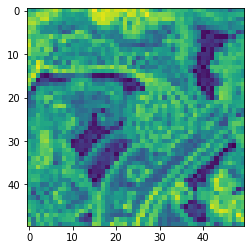

In [12]:
plt.imshow(traingray)

In [9]:
lbp_train_features

[array([[ 0.,  2.,  0., ...,  8., 26., 26.],
        [ 2., 26.,  1., ..., 26., 26., 26.],
        [ 0.,  2.,  3., ..., 26.,  9.,  9.],
        ...,
        [ 7.,  1., 26., ...,  1.,  9.,  1.],
        [ 0., 26.,  9., ...,  3., 26., 26.],
        [26., 26.,  8., ...,  0., 26., 26.]]),
 array([[ 1.,  3.,  1., ...,  1.,  1.,  6.],
        [ 2.,  2.,  2., ...,  1.,  2.,  8.],
        [ 2.,  3., 26., ..., 26., 26., 26.],
        ...,
        [26.,  0., 26., ...,  9.,  5.,  7.],
        [ 2.,  1., 26., ..., 26., 26., 26.],
        [ 2.,  2., 26., ..., 26., 26., 26.]]),
 array([[26.,  6.,  4., ...,  2.,  0.,  0.],
        [ 7.,  7.,  6., ...,  2.,  0.,  0.],
        [ 8.,  7.,  6., ...,  2.,  0.,  0.],
        ...,
        [ 7.,  9.,  9., ..., 10.,  7., 26.],
        [ 7.,  8.,  8., ...,  9., 26., 26.],
        [ 7.,  8.,  8., ...,  8., 26., 26.]]),
 array([[ 1.,  1.,  0., ..., 26.,  7.,  7.],
        [ 0.,  0.,  0., ...,  0.,  2.,  7.],
        [ 0.,  0.,  5., ...,  2., 26.,  8.],
        ..

In [10]:
train_data

['plain1train.jpeg',
 'pattern6train.jpeg',
 'plain3train.jpeg',
 'pattern5train.jpeg',
 'pattern3train.jpeg',
 'pattern7train.jpeg',
 'plain4train.jpeg',
 'pattern4train.jpeg',
 'pattern2train.jpeg',
 'plain2train.jpeg',
 'pattern1train.jpeg']

/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a

Match pattern:  plain1train.jpeg plain1test.jpeg


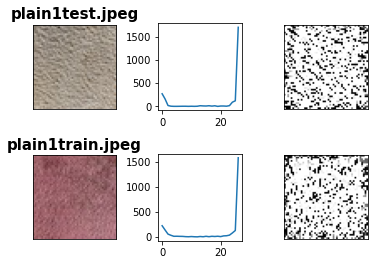

/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a

Match pattern:  plain4train.jpeg plain3test.jpeg


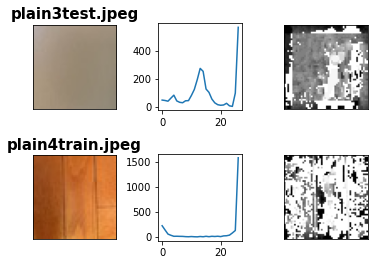

/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a

Match pattern:  pattern4train.jpeg pattern3test.jpeg


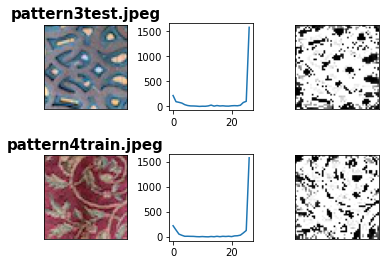

/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a

Match pattern:  pattern1train.jpeg pattern1test.jpeg


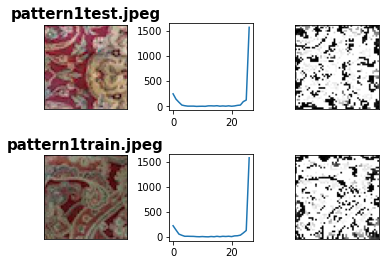

/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a

Match pattern:  plain1train.jpeg pattern4test.jpeg


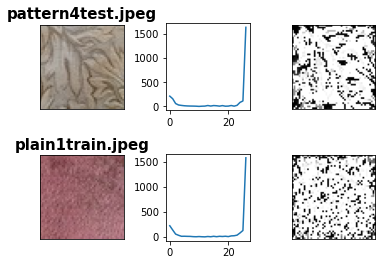

/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a

Match pattern:  pattern5train.jpeg pattern2test.jpeg


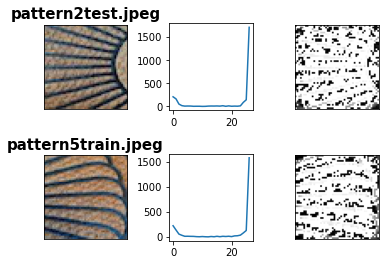

/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a

Match pattern:  pattern7train.jpeg plain2test.jpeg


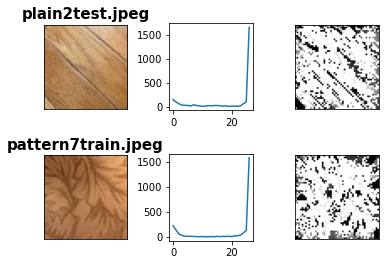

In [14]:
for filename_test in os.listdir(path_test):
    image_test = os.path.join(path_test, filename_test)
    testimg = Image.open(image_test)
    testarr = np.asarray(testimg)
    testgray = cv2.cvtColor(testarr, cv2.COLOR_BGR2GRAY)
    lbp_test_features = local_binary_pattern(testgray, num_pts, radius, 'uniform')  
    bins_num = int(lbp_test_features.max() + 1)
    test_hist, _ = np.histogram(lbp_test_features, bins=bins_num, range=(0, bins_num),density=None)
    mymet=0
    match=0
    q = []
    min_score = 10000 # Set a very large best score value initially
    
    fig = plt.figure()
    fig.subplots_adjust(wspace=.5)
    
    ax1 = fig.add_subplot(231)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    plt.xticks([])
    plt.yticks([])
    ax1.set_title(filename_test,fontsize=15, fontweight = 'bold')
    plt.subplot(231), plt.imshow(testimg)
    fig.subplots_adjust(hspace=.5)
    plt.subplot(232),plt.plot(test_hist)   
    
    ax3 = fig.add_subplot(233)
    ax3.set_xticklabels([])
    ax3.set_yticklabels([])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(233), plt.imshow(lbp_test_features, cmap ='gray')
    #plt.draw()
    ax2 = fig.add_subplot(234)
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])
    plt.xticks([])
    plt.yticks([])
    
    ax4 = fig.add_subplot(236)
    ax4.set_xticklabels([])
    ax4.set_yticklabels([])
    plt.xticks([])
    plt.yticks([])
    # ax2.set_title('Foundation Color',fontsize=15, fontweight = 'bold')
    
    
    for features in lbp_train_features:
        mymet=mymet+1
        histogram, _ = np.histogram(features, bins=bins_num, range=(0, bins_num),density=None)
        p = np.asarray(test_hist)
        q = np.asarray(histogram)
        filter_idx = np.where(np.logical_and(p != 0, q != 0))

        minima = np.minimum(test_hist,histogram)
        intersection = np.true_divide(np.sum(minima),np.sum(histogram))
        difidx = p-q
        score = .5*(np.sum((p-q)**2/(p+q+1e-10)))
        scorewas = wasserstein_distance(p,q)
        scorechisq = .5*(np.sum((p-q)**2/(p+q+1e-10)))
        scoresimple = np.sum((p-q)**2)
        scoreseucl = dist.euclidean(p,q)
        scoresman = dist.cityblock(p,q)
        #min value calculation
        if score < min_score:
            min_score = score
            match = mymet-1
    
    
    dir_train = os.path.join(path_train, train_data[match])
    matchedimg = Image.open(dir_train)
    matched_trainarr = np.asarray(matchedimg)
    matched_traingray = cv2.cvtColor(matched_trainarr, cv2.COLOR_BGR2GRAY)
    matched_train_lbp = local_binary_pattern(matched_traingray, num_pts, radius, 'uniform')
    
    
    print("\033[1m" + "Match pattern: ", train_data[match], filename_test + "\033[0m")
    plt.subplot(234),plt.imshow(matchedimg)
    ax2.set_title(train_data[match],fontsize=15, fontweight = 'bold')
    plt.subplot(236),plt.imshow(matched_train_lbp, cmap ='gray')
    
    plt.subplot(235),plt.plot(histogram) 
    plt.show()

In [22]:
path_face = 'Chapter2_input_images_for code/facedata/facecolr'
path_foundation = 'Chapter2_input_images_for code/facedata/foundcolr'

In [23]:
os.listdir(path_foundation)

['found3.JPG',
 'found4.JPG',
 'found7.JPG',
 'found2.JPG',
 'found1.JPG',
 'found8.JPG',
 'found10.JPG',
 'found6.JPG',
 'found5.JPG',
 'found9.JPG']

In [24]:
foundimg=[]
foundationcolr=[]
for filename_foundation in os.listdir(path_foundation):
    image_foundation = os.path.join(path_foundation, filename_foundation)
    print(image_foundation)
    foundationimg = Image.open(image_foundation)
    foundationarr = np.asarray(foundationimg)
    foundationcolr.append(foundationarr)
    foundimg.append(filename_foundation)

Chapter2_input_images_for code/facedata/foundcolr/found3.JPG
Chapter2_input_images_for code/facedata/foundcolr/found4.JPG
Chapter2_input_images_for code/facedata/foundcolr/found7.JPG
Chapter2_input_images_for code/facedata/foundcolr/found2.JPG
Chapter2_input_images_for code/facedata/foundcolr/found1.JPG
Chapter2_input_images_for code/facedata/foundcolr/found8.JPG
Chapter2_input_images_for code/facedata/foundcolr/found10.JPG
Chapter2_input_images_for code/facedata/foundcolr/found6.JPG
Chapter2_input_images_for code/facedata/foundcolr/found5.JPG
Chapter2_input_images_for code/facedata/foundcolr/found9.JPG


Match pattern:  found4.JPG facecol4.JPG


/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlsec/.conda/envs/mastering/lib/python3.7/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


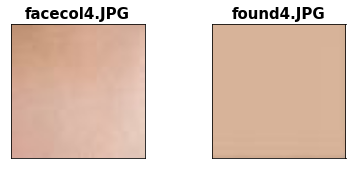

Match pattern:  found1.JPG facecol1.JPG


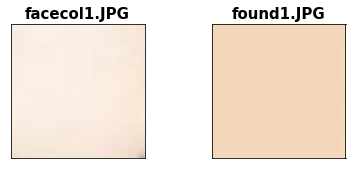

Match pattern:  found1.JPG facecol2.JPG


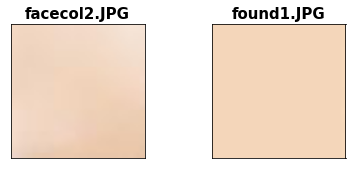

Match pattern:  found8.JPG facecol5.JPG


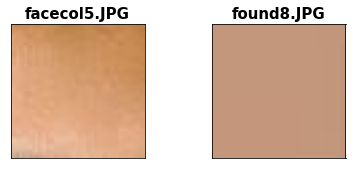

Match pattern:  found10.JPG facecol7.JPG


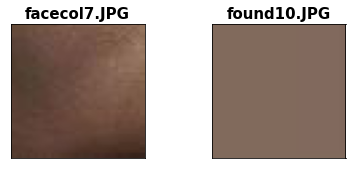

Match pattern:  found3.JPG facecol6.JPG


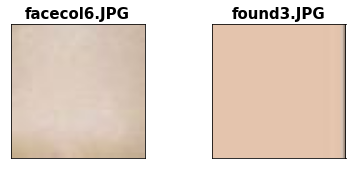

Match pattern:  found3.JPG facecol3.JPG


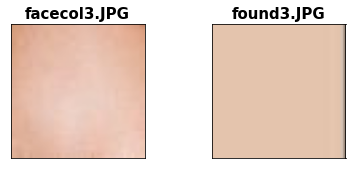

In [25]:
for filename_face in os.listdir(path_face):
    image_face = os.path.join(path_face, filename_face)
    faceimg = Image.open(image_face)
    facearr = np.asarray(faceimg)
    (mfc, sfc) = cv2.meanStdDev(facearr)
    statfc = np.concatenate([mfc, sfc]).flatten()
    face_bchannel=statfc[0]
    face_gchannel=statfc[1]
    face_rchannel=statfc[2]
    minsimilarity = 10000
    simidx =0
    matchidx=0
    figshade = plt.figure()
    figshade.subplots_adjust(wspace=.5)
    
    axshd1 = figshade.add_subplot(121)
    axshd1.set_xticklabels([])
    axshd1.set_yticklabels([])
    plt.xticks([])
    plt.yticks([])
    axshd1.set_title(filename_face,fontsize=15, fontweight = 'bold')
    plt.subplot(121), plt.imshow(faceimg) 
    
    #plt.draw()
    axshd2 = figshade.add_subplot(122)
    axshd2.set_xticklabels([])
    axshd2.set_yticklabels([])
    # axshd2.set_title(filename_face,fontsize=15, fontweight = 'bold')
    plt.xticks([])
    plt.yticks([])
    
    
    for shades in foundationcolr: 
        simidx +=1
        (mfnd, sfnd) = cv2.meanStdDev(shades)
        statfnd = np.concatenate([mfnd, sfnd]).flatten()
        foundation_bchannel=statfnd[0]
        foundation_gchannel=statfnd[1]
        foundation_rchannel=statfnd[2]
        dif_face_fnd = abs(0.299*(face_rchannel - foundation_rchannel) + 0.587*(face_gchannel - foundation_gchannel)+0.114*(face_bchannel - foundation_bchannel))
      #  print(filename_face,simidx,dif_face_fnd)
        
        if dif_face_fnd < minsimilarity:
            minsimilarity = dif_face_fnd
            matchidx = simidx-1
            
    dir_foundation = os.path.join(path_foundation, foundimg[matchidx])
    matchedfnd = Image.open(dir_foundation)
    
    print("\033[1m" + "Match pattern: ", foundimg[matchidx], filename_face + "\033[0m")

    axshd2.set_title(foundimg[matchidx],fontsize=15, fontweight = 'bold')
    plt.subplot(122),plt.imshow(matchedfnd)
    
    plt.show()